# Processing TikTok Post Data

In [24]:
# ! pip install pandas
# ! pip install matplotlib
# ! pip install gensim

In [25]:
# ! pip3 install wordsegment
# import sys
# print(sys.executable)
# !/usr/local/bin/python3 -m pip install wordsegment 
# !/usr/local/bin/python3 -m pip install gensim

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np
from PIL import Image
import re
from wordsegment import load, segment
from gensim.models import Word2Vec
from sklearn.preprocessing import FunctionTransformer
import seaborn as sns
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [27]:
# df = pd.read_csv('users_vids_short.csv')
# df = pd.read_csv('sug_users_vids1.csv')
df = pd.read_csv("../../rawData/TikTok/tiktokReelData.csv")

In [28]:
df.head()

,id,create_time,user_name,hashtags,song,video_length,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,n_total_vids
0,6892428462015958273,1604768557,john.cena10,"['johncena', 'love', 'tiktok', 'fyp', 'foryoup...",الصوت الأصلي,8,1984,3,18,12800,1000000,4700000,211
1,6891790235336822018,1604619960,john.cena10,"['johncena', 'love', 'tiktok', 'halloween', 'q...",الصوت الأصلي,6,7372,9,51,52800,1000000,4700000,211
2,6891264678832475393,1604497592,john.cena10,"['johncena', 'love', 'fyp', 'foryoupage']",The Time Is Now (John Cena),5,4623,11,27,37700,1000000,4700000,211
3,6891050048403049730,1604447622,john.cena10,"['johncena', 'fyp', 'foryoupage', 'viral', 'co...",الصوت الأصلي,6,7931,6,24,51200,1000000,4700000,211
4,6890886086613126402,1604409445,john.cena10,"['johncena', 'foryoupage', 'fyp', 'viral']",الصوت الأصلي,15,3229,9,14,24700,1000000,4700000,211


#### Remove Unnecessary Data 

In [29]:
df.drop(['id', 'user_name', 'song', 'video_length', 'n_total_vids'], axis=1, inplace=True)
df.head()

,create_time,hashtags,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes
0,1604768557,"['johncena', 'love', 'tiktok', 'fyp', 'foryoup...",1984,3,18,12800,1000000,4700000
1,1604619960,"['johncena', 'love', 'tiktok', 'halloween', 'q...",7372,9,51,52800,1000000,4700000
2,1604497592,"['johncena', 'love', 'fyp', 'foryoupage']",4623,11,27,37700,1000000,4700000
3,1604447622,"['johncena', 'fyp', 'foryoupage', 'viral', 'co...",7931,6,24,51200,1000000,4700000
4,1604409445,"['johncena', 'foryoupage', 'fyp', 'viral']",3229,9,14,24700,1000000,4700000


### Processing Time

In [30]:
df['datetime'] = pd.to_datetime(df['create_time'], unit='s')
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['weekday'] = df['datetime'].dt.weekday
df['hour'] = df['datetime'].dt.hour
df.head()

,create_time,hashtags,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,datetime,year,month,day,weekday,hour
0,1604768557,"['johncena', 'love', 'tiktok', 'fyp', 'foryoup...",1984,3,18,12800,1000000,4700000,2020-11-07 17:02:37,2020,11,7,5,17
1,1604619960,"['johncena', 'love', 'tiktok', 'halloween', 'q...",7372,9,51,52800,1000000,4700000,2020-11-05 23:46:00,2020,11,5,3,23
2,1604497592,"['johncena', 'love', 'fyp', 'foryoupage']",4623,11,27,37700,1000000,4700000,2020-11-04 13:46:32,2020,11,4,2,13
3,1604447622,"['johncena', 'fyp', 'foryoupage', 'viral', 'co...",7931,6,24,51200,1000000,4700000,2020-11-03 23:53:42,2020,11,3,1,23
4,1604409445,"['johncena', 'foryoupage', 'fyp', 'viral']",3229,9,14,24700,1000000,4700000,2020-11-03 13:17:25,2020,11,3,1,13


##### Cyclical Encoding

In [31]:
def cyclicSinEncoding(timePeriod):
    encoding = FunctionTransformer(lambda x: np.sin(x / timePeriod * 2 * np.pi))
    return encoding 

def cyclicCosEncoding(timePeriod):
    encoding = FunctionTransformer(lambda x: np.cos(x / timePeriod * 2 * np.pi))
    return encoding 

df['monthSin'] = cyclicSinEncoding(12).fit_transform(df["month"])
df['monthCos'] = cyclicCosEncoding(12).fit_transform(df["month"])

df['daySin'] = cyclicSinEncoding(31).fit_transform(df['day'])
df['dayCos'] = cyclicCosEncoding(31).fit_transform(df['day'])

df['hourSin'] = cyclicSinEncoding(24).fit_transform(df['hour'])
df['hourCos'] = cyclicCosEncoding(24).fit_transform(df['hour'])

df['weekdaySin'] = cyclicSinEncoding(7).fit_transform(df['weekday'])
df['weekdayCos'] = cyclicCosEncoding(7).fit_transform(df['weekday'])


df.head()

,create_time,hashtags,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,datetime,year,...,weekday,hour,monthSin,monthCos,daySin,dayCos,hourSin,hourCos,weekdaySin,weekdayCos
0,1604768557,"['johncena', 'love', 'tiktok', 'fyp', 'foryoup...",1984,3,18,12800,1000000,4700000,2020-11-07 17:02:37,2020,...,5,17,-0.5,0.866025,0.988468,0.151428,-0.965926,-0.258819,-0.974928,-0.222521
1,1604619960,"['johncena', 'love', 'tiktok', 'halloween', 'q...",7372,9,51,52800,1000000,4700000,2020-11-05 23:46:00,2020,...,3,23,-0.5,0.866025,0.848644,0.528964,-0.258819,0.965926,0.433884,-0.900969
2,1604497592,"['johncena', 'love', 'fyp', 'foryoupage']",4623,11,27,37700,1000000,4700000,2020-11-04 13:46:32,2020,...,2,13,-0.5,0.866025,0.724793,0.688967,-0.258819,-0.965926,0.974928,-0.222521
3,1604447622,"['johncena', 'fyp', 'foryoupage', 'viral', 'co...",7931,6,24,51200,1000000,4700000,2020-11-03 23:53:42,2020,...,1,23,-0.5,0.866025,0.571268,0.820763,-0.258819,0.965926,0.781831,0.623490
4,1604409445,"['johncena', 'foryoupage', 'fyp', 'viral']",3229,9,14,24700,1000000,4700000,2020-11-03 13:17:25,2020,...,1,13,-0.5,0.866025,0.571268,0.820763,-0.258819,-0.965926,0.781831,0.623490


In [32]:
df.to_csv('plotTime.csv', index=False)

##### Removing Unnecessary Time Data

In [33]:
df.drop(['weekday', 'hour', 'month', 'day', 'datetime', 'create_time'], axis=1, inplace=True)
df.head()

,hashtags,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,year,monthSin,monthCos,daySin,dayCos,hourSin,hourCos,weekdaySin,weekdayCos
0,"['johncena', 'love', 'tiktok', 'fyp', 'foryoup...",1984,3,18,12800,1000000,4700000,2020,-0.5,0.866025,0.988468,0.151428,-0.965926,-0.258819,-0.974928,-0.222521
1,"['johncena', 'love', 'tiktok', 'halloween', 'q...",7372,9,51,52800,1000000,4700000,2020,-0.5,0.866025,0.848644,0.528964,-0.258819,0.965926,0.433884,-0.900969
2,"['johncena', 'love', 'fyp', 'foryoupage']",4623,11,27,37700,1000000,4700000,2020,-0.5,0.866025,0.724793,0.688967,-0.258819,-0.965926,0.974928,-0.222521
3,"['johncena', 'fyp', 'foryoupage', 'viral', 'co...",7931,6,24,51200,1000000,4700000,2020,-0.5,0.866025,0.571268,0.820763,-0.258819,0.965926,0.781831,0.623490
4,"['johncena', 'foryoupage', 'fyp', 'viral']",3229,9,14,24700,1000000,4700000,2020,-0.5,0.866025,0.571268,0.820763,-0.258819,-0.965926,0.781831,0.623490


### Processing Hashtags

#### Handle NaN Data

In [34]:
# Convert hashtags to string 

df['hashtags'] = df['hashtags'].apply(ast.literal_eval)
df['hashtags'] = df['hashtags'].apply(lambda x: x if x != [] else ["nohashtag"])

def processHashtags(hashtags):
    for i in range(len(hashtags)):
        if not hashtags[i].strip(): 
            hashtags[i] = 'nohashtag'
    return hashtags

df['hashtags'] = df['hashtags'].apply(processHashtags)

df.head()

,hashtags,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,year,monthSin,monthCos,daySin,dayCos,hourSin,hourCos,weekdaySin,weekdayCos
0,"[johncena, love, tiktok, fyp, foryoupage, vibes]",1984,3,18,12800,1000000,4700000,2020,-0.5,0.866025,0.988468,0.151428,-0.965926,-0.258819,-0.974928,-0.222521
1,"[johncena, love, tiktok, halloween, queen, rob...",7372,9,51,52800,1000000,4700000,2020,-0.5,0.866025,0.848644,0.528964,-0.258819,0.965926,0.433884,-0.900969
2,"[johncena, love, fyp, foryoupage]",4623,11,27,37700,1000000,4700000,2020,-0.5,0.866025,0.724793,0.688967,-0.258819,-0.965926,0.974928,-0.222521
3,"[johncena, fyp, foryoupage, viral, comedy, cha...",7931,6,24,51200,1000000,4700000,2020,-0.5,0.866025,0.571268,0.820763,-0.258819,0.965926,0.781831,0.623490
4,"[johncena, foryoupage, fyp, viral]",3229,9,14,24700,1000000,4700000,2020,-0.5,0.866025,0.571268,0.820763,-0.258819,-0.965926,0.781831,0.623490


In [35]:
explodedDf = df['hashtags'].explode()

#### Remove Special Characters

In [36]:
def removeSpecialCharacters(hashtags):
    processedHashtag = [re.sub(r'[^a-zA-Z0-9]', '', hashtag) for hashtag in hashtags]
    processedHashtag = [hashtag.lower() for hashtag in processedHashtag]
    return processedHashtag

In [37]:
df['hashtags'] = df['hashtags'].apply(removeSpecialCharacters)
df.head()

,hashtags,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,year,monthSin,monthCos,daySin,dayCos,hourSin,hourCos,weekdaySin,weekdayCos
0,"[johncena, love, tiktok, fyp, foryoupage, vibes]",1984,3,18,12800,1000000,4700000,2020,-0.5,0.866025,0.988468,0.151428,-0.965926,-0.258819,-0.974928,-0.222521
1,"[johncena, love, tiktok, halloween, queen, rob...",7372,9,51,52800,1000000,4700000,2020,-0.5,0.866025,0.848644,0.528964,-0.258819,0.965926,0.433884,-0.900969
2,"[johncena, love, fyp, foryoupage]",4623,11,27,37700,1000000,4700000,2020,-0.5,0.866025,0.724793,0.688967,-0.258819,-0.965926,0.974928,-0.222521
3,"[johncena, fyp, foryoupage, viral, comedy, cha...",7931,6,24,51200,1000000,4700000,2020,-0.5,0.866025,0.571268,0.820763,-0.258819,0.965926,0.781831,0.623490
4,"[johncena, foryoupage, fyp, viral]",3229,9,14,24700,1000000,4700000,2020,-0.5,0.866025,0.571268,0.820763,-0.258819,-0.965926,0.781831,0.623490


In [38]:
explodedDf.value_counts()

nohashtag      15994
fyp             7099
foryou          6425
foryoupage      3718
viral           1754
               ...  
pageforyou         1
polishcow          1
🔥                  1
runforit           1
summernails        1
Name: hashtags, Length: 16567, dtype: int64

#### Handling Similar Hashtags

In [39]:
def processSimilarHashtags(hashtags):
    similarHashtags = ['fypforyoupage', 'fyp', 'foryou', 'foru', 'foruyou', 'fouryou', 'foryourpage', 'foryouu', 'foryoupag', '4you', 'fypforyou', 'foryoupagee', 'fouryoupage', 'fypforyourpage', 'foreyou', 'foreyoupage', 'foryour', 'foyou', 'fouyoupage' 'foryourpag', '4youpage', 'fypforyoupa', 'foryoupqge', 'fouryoupag', 'foryoupge', 'foyoupage', 'foryouoage', 'foryoyoupage', 'foreyourpage', 'foryourpages', 'fy']
    
    for i in range(len(hashtags)):
        
        if hashtags[i] in similarHashtags:
            hashtags[i] = 'foryoupage'
        
        if not hashtags[i].strip():
            hashtags[i] = 'nohashtag'
    return hashtags

df['hashtags'] = df['hashtags'].apply(processSimilarHashtags)


In [40]:
explodedDf = df['hashtags'].explode()
counts = explodedDf.value_counts()
counts.to_csv('hashtag_counts.csv')
print(counts)

foryoupage        18781
nohashtag         18624
viral              1760
tiktok             1658
trending           1384
                  ...  
sheisaprincess        1
ektachhele            1
vatsalsheth           1
milk                  1
giftfromlyft          1
Name: hashtags, Length: 14555, dtype: int64


In [41]:
df.to_csv('TikTokPosts.csv', index=False)

#### Split Words in Hashtag

In [42]:
def splitHashtagByWords(hashtags):
    wordsToIgnore = ['tiktok']
    splitHashtags = []
    for hashtag in hashtags:
        if hashtag in wordsToIgnore:
             splitHashtags.append([hashtag])
        else:    
            splitHashtags.append(segment(hashtag))
    return splitHashtags

load()
splitHashtags = df['hashtags'].apply(splitHashtagByWords)

processedHashtag = []
for hashtag in splitHashtags:
    for tag in hashtag:
        processedHashtag.append(tag)

df.head()

,hashtags,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,year,monthSin,monthCos,daySin,dayCos,hourSin,hourCos,weekdaySin,weekdayCos
0,"[johncena, love, tiktok, foryoupage, foryoupag...",1984,3,18,12800,1000000,4700000,2020,-0.5,0.866025,0.988468,0.151428,-0.965926,-0.258819,-0.974928,-0.222521
1,"[johncena, love, tiktok, halloween, queen, rob...",7372,9,51,52800,1000000,4700000,2020,-0.5,0.866025,0.848644,0.528964,-0.258819,0.965926,0.433884,-0.900969
2,"[johncena, love, foryoupage, foryoupage]",4623,11,27,37700,1000000,4700000,2020,-0.5,0.866025,0.724793,0.688967,-0.258819,-0.965926,0.974928,-0.222521
3,"[johncena, foryoupage, foryoupage, viral, come...",7931,6,24,51200,1000000,4700000,2020,-0.5,0.866025,0.571268,0.820763,-0.258819,0.965926,0.781831,0.623490
4,"[johncena, foryoupage, foryoupage, viral]",3229,9,14,24700,1000000,4700000,2020,-0.5,0.866025,0.571268,0.820763,-0.258819,-0.965926,0.781831,0.623490


#### Encode Hashtags using Word2Vec

In [43]:
model = Word2Vec(sentences=processedHashtag, vector_size=200, window=5, min_count=1, sg=1, workers=4)

model.save("hashtags_word2vec.model")

# If you need to encode a whole hashtag or sentence, average the vectors of the constituent words
def encodeHashtag(hashtag):
    
    if any(word in model.wv.key_to_index for word in hashtag):
        vector = sum(model.wv[word] for word in hashtag if word in model.wv) / len(hashtag)
        return vector
    else:
        # Return a zero vector if none of the words are in the vocabulary
        return np.zeros(model.vector_size)

def encodeHashtagArray(hashtags):
    vectors = []
    for hashtag in hashtags:
        vector = encodeHashtag(hashtag)
        vectors.append(vector)
    
    if vectors:
        return np.mean(vectors, axis=0)
    else: 
        return np.zeros(model.vector_size)
    
df['hashtag_vectors'] = df['hashtags'].apply(encodeHashtagArray)
df.head()

,hashtags,n_likes,n_shares,n_comments,n_plays,n_followers,n_total_likes,year,monthSin,monthCos,daySin,dayCos,hourSin,hourCos,weekdaySin,weekdayCos,hashtag_vectors
0,"[johncena, love, tiktok, foryoupage, foryoupag...",1984,3,18,12800,1000000,4700000,2020,-0.5,0.866025,0.988468,0.151428,-0.965926,-0.258819,-0.974928,-0.222521,"[-0.24361365, -0.23358543, 0.03463645, -0.0800..."
1,"[johncena, love, tiktok, halloween, queen, rob...",7372,9,51,52800,1000000,4700000,2020,-0.5,0.866025,0.848644,0.528964,-0.258819,0.965926,0.433884,-0.900969,"[-0.25227836, -0.2355098, 0.007123495, -0.0723..."
2,"[johncena, love, foryoupage, foryoupage]",4623,11,27,37700,1000000,4700000,2020,-0.5,0.866025,0.724793,0.688967,-0.258819,-0.965926,0.974928,-0.222521,"[-0.26302886, -0.18651602, 0.05916618, -0.0950..."
3,"[johncena, foryoupage, foryoupage, viral, come...",7931,6,24,51200,1000000,4700000,2020,-0.5,0.866025,0.571268,0.820763,-0.258819,0.965926,0.781831,0.623490,"[-0.27125552, -0.2213984, 0.0651619, -0.042526..."
4,"[johncena, foryoupage, foryoupage, viral]",3229,9,14,24700,1000000,4700000,2020,-0.5,0.866025,0.571268,0.820763,-0.258819,-0.965926,0.781831,0.623490,"[-0.27277288, -0.18909337, 0.069288224, -0.097..."


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41702 entries, 0 to 41701
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hashtags         41702 non-null  object 
 1   n_likes          41702 non-null  int64  
 2   n_shares         41702 non-null  int64  
 3   n_comments       41702 non-null  int64  
 4   n_plays          41702 non-null  int64  
 5   n_followers      41702 non-null  int64  
 6   n_total_likes    41702 non-null  int64  
 7   year             41702 non-null  int64  
 8   monthSin         41702 non-null  float64
 9   monthCos         41702 non-null  float64
 10  daySin           41702 non-null  float64
 11  dayCos           41702 non-null  float64
 12  hourSin          41702 non-null  float64
 13  hourCos          41702 non-null  float64
 14  weekdaySin       41702 non-null  float64
 15  weekdayCos       41702 non-null  float64
 16  hashtag_vectors  41702 non-null  object 
dtypes: float64(8

### Processing Outliers

### Data Scaling

In [45]:
# import seaborn as sns
# from sklearn.preprocessing import RobustScaler, MinMaxScaler

# sns.set_theme(palette="rainbow", style="darkgrid")

In [46]:
def calculateStatMeasures(col):
    print(f'{col}: mean={df[col].mean()}, median={df[col].median()}, mode={df[col].mode()}, std={df[col].std()}')

def plotData(xLabel, yLabel, x, y, title):
    plt.scatter(x, y, s=3)
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.show()

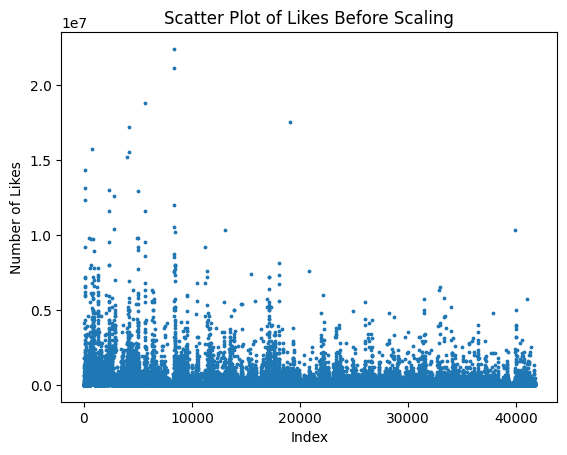

n_likes: mean=241869.3691189871, median=46100.0, mode=0    1100000
dtype: int64, std=685308.7832132428
nLikes: mean=10.344355060791639, median=10.738589920723442, mode=0    13.910822
dtype: float64, std=2.5005743758773296


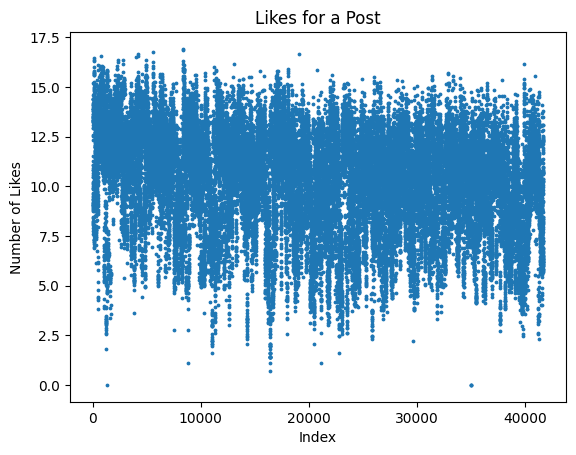

In [47]:
plt.scatter(df.index, df['n_likes'], s=3)
plt.title('Scatter Plot of Likes Before Scaling',)
plt.xlabel('Index')
plt.ylabel('Number of Likes')
plt.show()

df['nLikes'] = np.log1p(df['n_likes'])
df['nShares'] = np.log1p(df['n_shares'])

calculateStatMeasures('n_likes')
calculateStatMeasures('nLikes')

plt.scatter(df.index, df['nLikes'], s=3)
plt.title('Likes for a Post')
plt.xlabel('Index')
plt.ylabel('Number of Likes')
plt.show()

n_followers: mean=4238835.779267182, median=2200000.0, mode=0    1300000
dtype: int64, std=6150926.852314888
nFollowers: mean=14.103657557402425, median=14.603968372873895, mode=0    14.077876
dtype: float64, std=2.0219546464476115


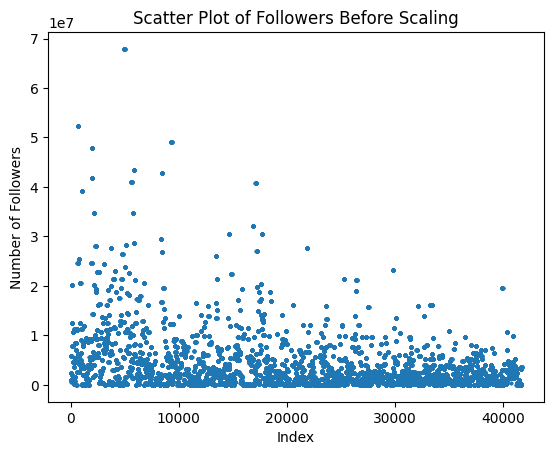

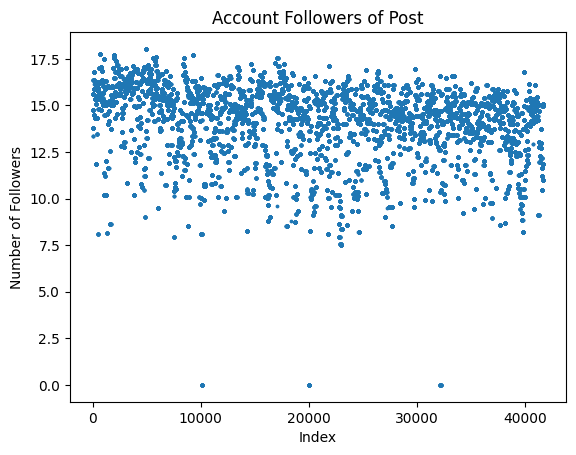

In [48]:
df['nFollowers'] = np.log1p(df['n_followers'])

calculateStatMeasures('n_followers')
calculateStatMeasures('nFollowers')

plt.scatter(df.index, df['n_followers'], s=3)
plt.title('Scatter Plot of Followers Before Scaling')
plt.xlabel('Index')
plt.ylabel('Number of Followers')
plt.show()

plt.scatter(df.index, df['nFollowers'], s=3)
plt.title('Account Followers of Post')
plt.xlabel('Index')
plt.ylabel('Number of Followers')
plt.show()

In [49]:
# from sklearn.preprocessing import StandardScaler

# calculateStatMeasures('n_comments')

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df[['n_comments']])

# df['nComments'] = scaled_data
# df['comments_log'] = np.log1p(df['n_comments'])

# plotData('Index', 'Number of Comments', df.index, df['n_comments'], 'Scatter Plot of Comments Before Scaling')
# plotData('Index', 'Number of Comments',df.index, df['comments_log'],'Scatter Plot of Comments After Log Scaling')

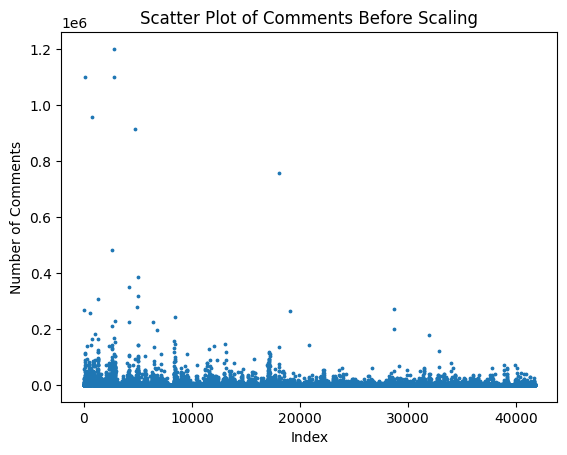

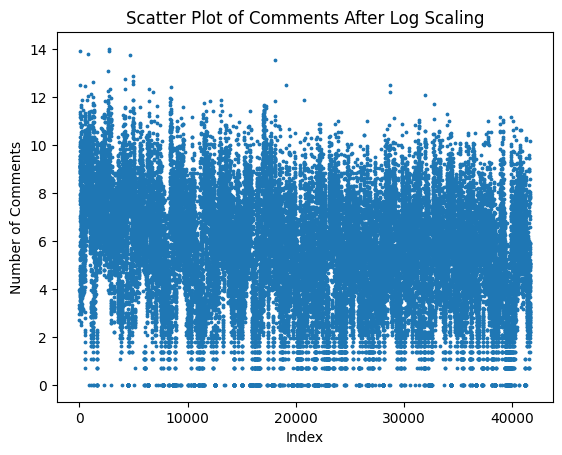

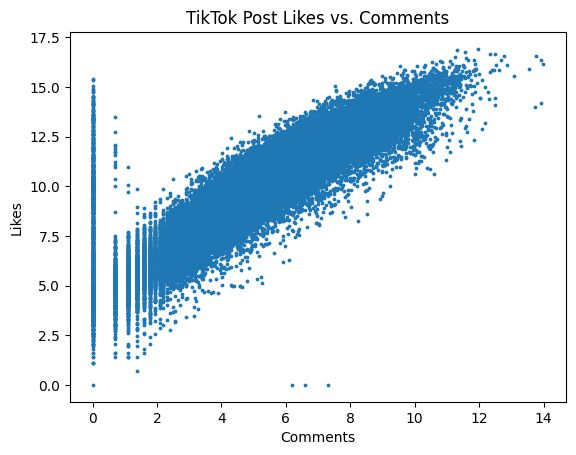

In [50]:
df['comments_log'] = np.log1p(df['n_comments'])

plotData('Index', 'Number of Comments', df.index, df['n_comments'], 'Scatter Plot of Comments Before Scaling')
plotData('Index', 'Number of Comments',df.index, df['comments_log'],'Scatter Plot of Comments After Log Scaling')

plotData('Comments', 'Likes', df['comments_log'], df['nLikes'], 'TikTok Post Likes vs. Comments')


n_plays: mean=1702947.471488178, median=326950.0, mode=0    1100000
dtype: int64, std=6436514.626008332
nViews: mean=12.3259211493001, median=12.697565579862887, mode=0    13.910822
dtype: float64, std=2.427284091624411


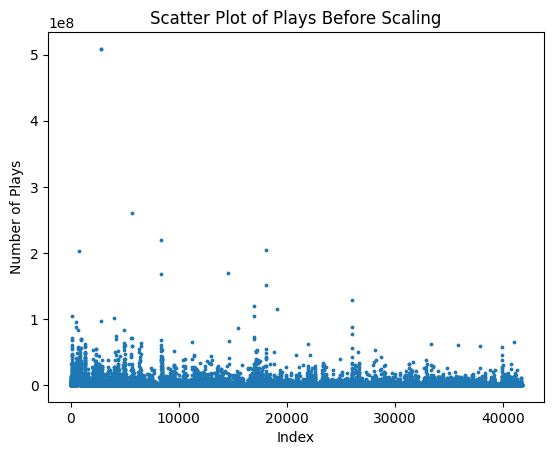

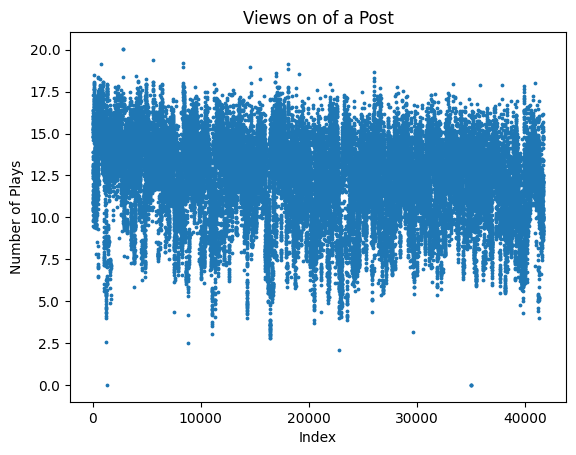

n_shares: mean=2223.7590283439645, median=146.0, mode=0    0
dtype: int64, std=13281.192558419061
nShares: mean=4.955473707656837, median=4.990432586778736, mode=0    0.0
dtype: float64, std=2.449229958777594


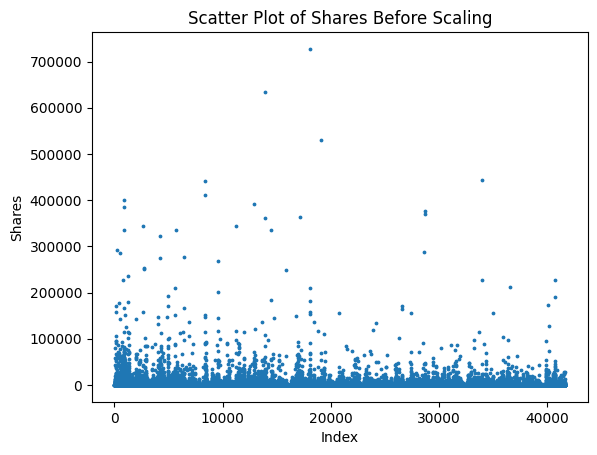

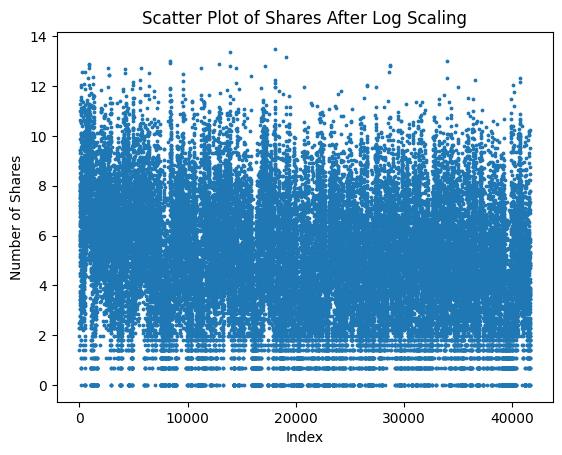

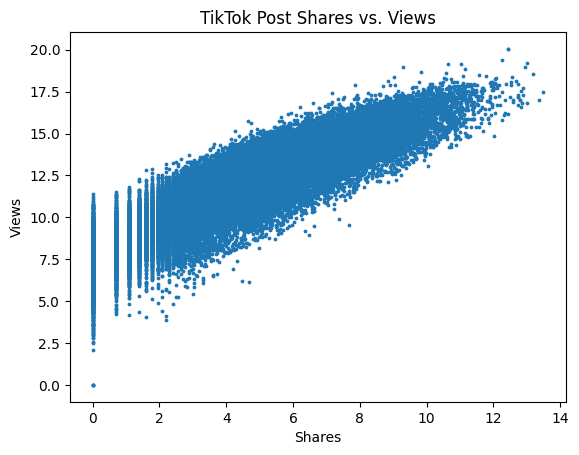

In [51]:
df['nViews'] = np.log1p(df['n_plays'])

calculateStatMeasures('n_plays')
calculateStatMeasures('nViews')

plotData('Index', 'Number of Plays', df.index, df['n_plays'], 'Scatter Plot of Plays Before Scaling')
plotData('Index', 'Number of Plays', df.index, df['nViews'], 'Views on of a Post')

df['nShares'] = np.log1p(df['n_shares'])

calculateStatMeasures('n_shares')
calculateStatMeasures('nShares')

plotData('Index', 'Shares', df.index, df['n_shares'], 'Scatter Plot of Shares Before Scaling')
plotData('Index', 'Number of Shares', df.index, df['nShares'], 'Scatter Plot of Shares After Log Scaling')
plotData('Shares', 'Views', df['nShares'], df['nViews'], 'TikTok Post Shares vs. Views')


n_total_likes: mean=115376893.07647115, median=29800000.0, mode=0    1200000
dtype: int64, std=255449188.8493202
nAccountTotalLikes: mean=16.681920883398256, median=17.21001898503268, mode=0    13.997833
dtype: float64, std=2.5212904078000586
n_followers: mean=4238835.779267182, median=2200000.0, mode=0    1300000
dtype: int64, std=6150926.852314888
nFollowers: mean=14.103657557402425, median=14.603968372873895, mode=0    14.077876
dtype: float64, std=2.0219546464476115


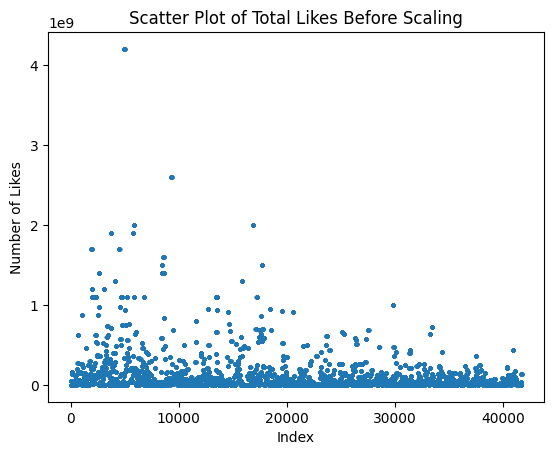

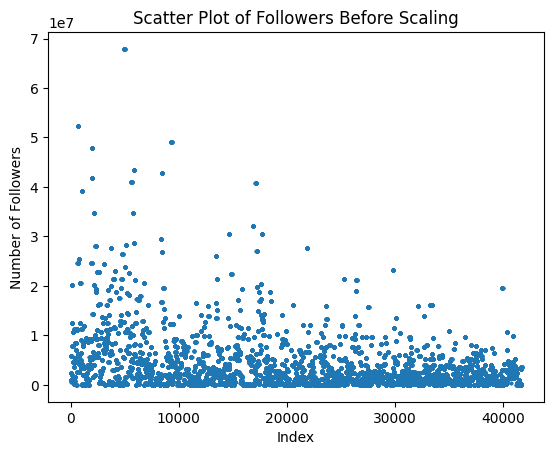

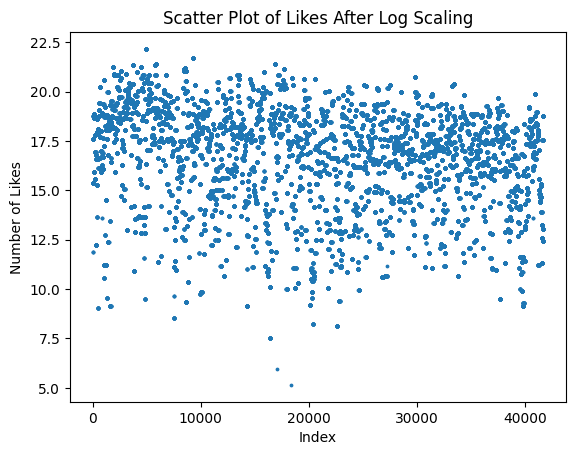

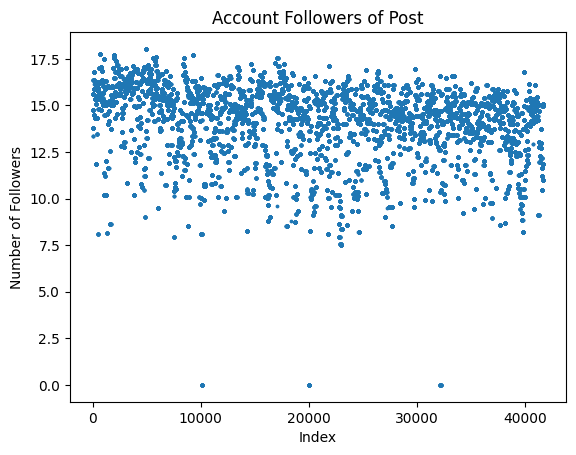

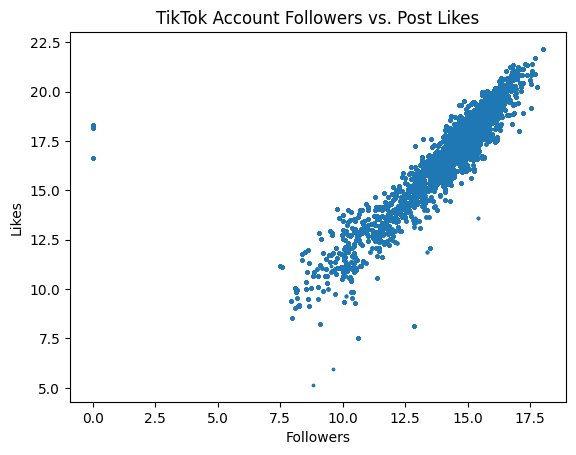

In [52]:
df['nAccountTotalLikes'] = np.log1p(df['n_total_likes'])
df['nFollowers'] = np.log1p(df['n_followers'])

calculateStatMeasures('n_total_likes')
calculateStatMeasures('nAccountTotalLikes')

calculateStatMeasures('n_followers')
calculateStatMeasures('nFollowers')


plotData('Index', 'Number of Likes', df.index, df['n_total_likes'], 'Scatter Plot of Total Likes Before Scaling')
plotData('Index', 'Number of Followers', df.index, df['n_followers'], 'Scatter Plot of Followers Before Scaling')

plotData('Index', 'Number of Likes', df.index, df['nAccountTotalLikes'], 'Scatter Plot of Likes After Log Scaling')
plotData('Index', 'Number of Followers', df.index, df['nFollowers'], 'Account Followers of Post')

plotData('Followers', 'Likes', df['nFollowers'], df['nAccountTotalLikes'], 'TikTok Account Followers vs. Post Likes')

In [53]:
df.head()
df.drop(['n_shares', 'n_likes', 'n_comments', 'n_plays', 'n_followers','n_total_likes'], axis=1, inplace=True)

df.head()


,hashtags,year,monthSin,monthCos,daySin,dayCos,hourSin,hourCos,weekdaySin,weekdayCos,hashtag_vectors,nLikes,nShares,nFollowers,comments_log,nViews,nAccountTotalLikes
0,"[johncena, love, tiktok, foryoupage, foryoupag...",2020,-0.5,0.866025,0.988468,0.151428,-0.965926,-0.258819,-0.974928,-0.222521,"[-0.24361365, -0.23358543, 0.03463645, -0.0800...",7.593374,1.386294,13.815512,2.944439,9.457279,15.363073
1,"[johncena, love, tiktok, halloween, queen, rob...",2020,-0.5,0.866025,0.848644,0.528964,-0.258819,0.965926,0.433884,-0.900969,"[-0.25227836, -0.2355098, 0.007123495, -0.0723...",8.905580,2.302585,13.815512,3.951244,10.874285,15.363073
2,"[johncena, love, foryoupage, foryoupage]",2020,-0.5,0.866025,0.724793,0.688967,-0.258819,-0.965926,0.974928,-0.222521,"[-0.26302886, -0.18651602, 0.05916618, -0.0950...",8.439015,2.484907,13.815512,3.332205,10.537442,15.363073
3,"[johncena, foryoupage, foryoupage, viral, come...",2020,-0.5,0.866025,0.571268,0.820763,-0.258819,0.965926,0.781831,0.623490,"[-0.27125552, -0.2213984, 0.0651619, -0.042526...",8.978660,1.945910,13.815512,3.218876,10.843514,15.363073
4,"[johncena, foryoupage, foryoupage, viral]",2020,-0.5,0.866025,0.571268,0.820763,-0.258819,-0.965926,0.781831,0.623490,"[-0.27277288, -0.18909337, 0.069288224, -0.097...",8.080237,2.302585,13.815512,2.708050,10.114599,15.363073


### Calculating Statistical Measurements 

In [54]:
# statColumns = ['video_length', 'n_likes', 'n_shares', 'n_comments', 'n_plays', 'n_followers', 'n_total_likes', 'year']

# print('<data>: <mean>, <median>, <mode>')
# # print(f'{"video_length"}: {df["video_length"].mean()}, {df["video_length"].median()}, {df["video_length"].mode()}')
# for col in statColumns:
#     if pd.api.types.is_numeric_dtype(df[col]):

#         print(f'{col}: {df[col].mean()}, {df[col].median()}, {df[col].mode()}, std: {df[col].std()}')
#     else:
#         print(f'{col}: Not a numeric column')


### Store Preprocessed Data

In [55]:
df.to_csv('TikTokPosts.csv', index=False)